In [1]:
import numpy as np 
import math 
import torch.nn as nn 
import torch 
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# %matplotlib inline

# Dataset definition

In [2]:
noise=[0,0.05,0.1,0.15,0.2]
toy_ds, labels = make_moons(noise=noise[1])

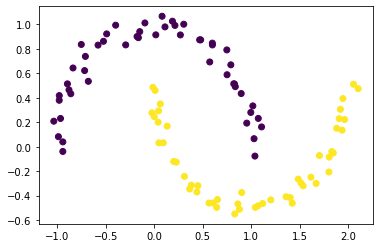

In [3]:
plt.scatter(x=toy_ds[:,0], y =toy_ds[:,1], c =labels);

In [4]:
# Teset set and training set definitions
toy_ds_train, toy_ds_test, labels_train, labels_test =  train_test_split(toy_ds, labels,test_size=0.2)

train_tensor_points = torch.FloatTensor(toy_ds_train)
train_tensor_labels = torch.FloatTensor(labels_train).resize(len(labels_train),1)

test_tensor_points = torch.FloatTensor(toy_ds_test)
test_tensor_labels = torch.FloatTensor(labels_test).resize(len(labels_test),1)

/Users/qbecker/opt/anaconda3/envs/NavGanEnv/lib/python3.8/site-packages/torch/tensor.py:447: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


# Neural Net Definition

In [5]:
#Basic Neural Net class
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        
        self.model = nn.Sequential(
            nn.Linear(2,50),
            nn.ReLU(),
            nn.Linear(50,1),
            nn.Sigmoid()
        ) 
        
    def forward(self, x):
        res = self.model(x)
        return res

# Training

In [6]:
#Training with toy dataset:

classifier = SimpleNN()

# 1 - Loss definition    
loss = torch.nn.BCELoss()

if torch.cuda.is_available():
    classifier.cuda()
    loss.cuda()
    
#Optimizer definition 
optimizer  = torch.optim.Adam(classifier.parameters())


In [7]:
epochs=[10,20,50,100,500,2000]
loss_evolution=[]
for i in range(epochs[5]):
    optimizer.zero_grad()
 
    outputs = classifier(train_tensor_points)
    
    loss_i = loss(outputs,train_tensor_labels)
    loss_i.backward()

    optimizer.step()

    loss_evolution.append(loss_i.item())
    
        


# Visualization 

## Training Loss

Text(0.5, 1.0, 'Loss evolution against epochs')

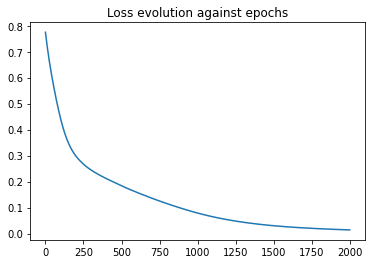

In [8]:
plt.plot(loss_evolution)
plt.title("Loss evolution against epochs")

## Gradient magnitude

In [1]:
import generator
# %matplotlib notebook


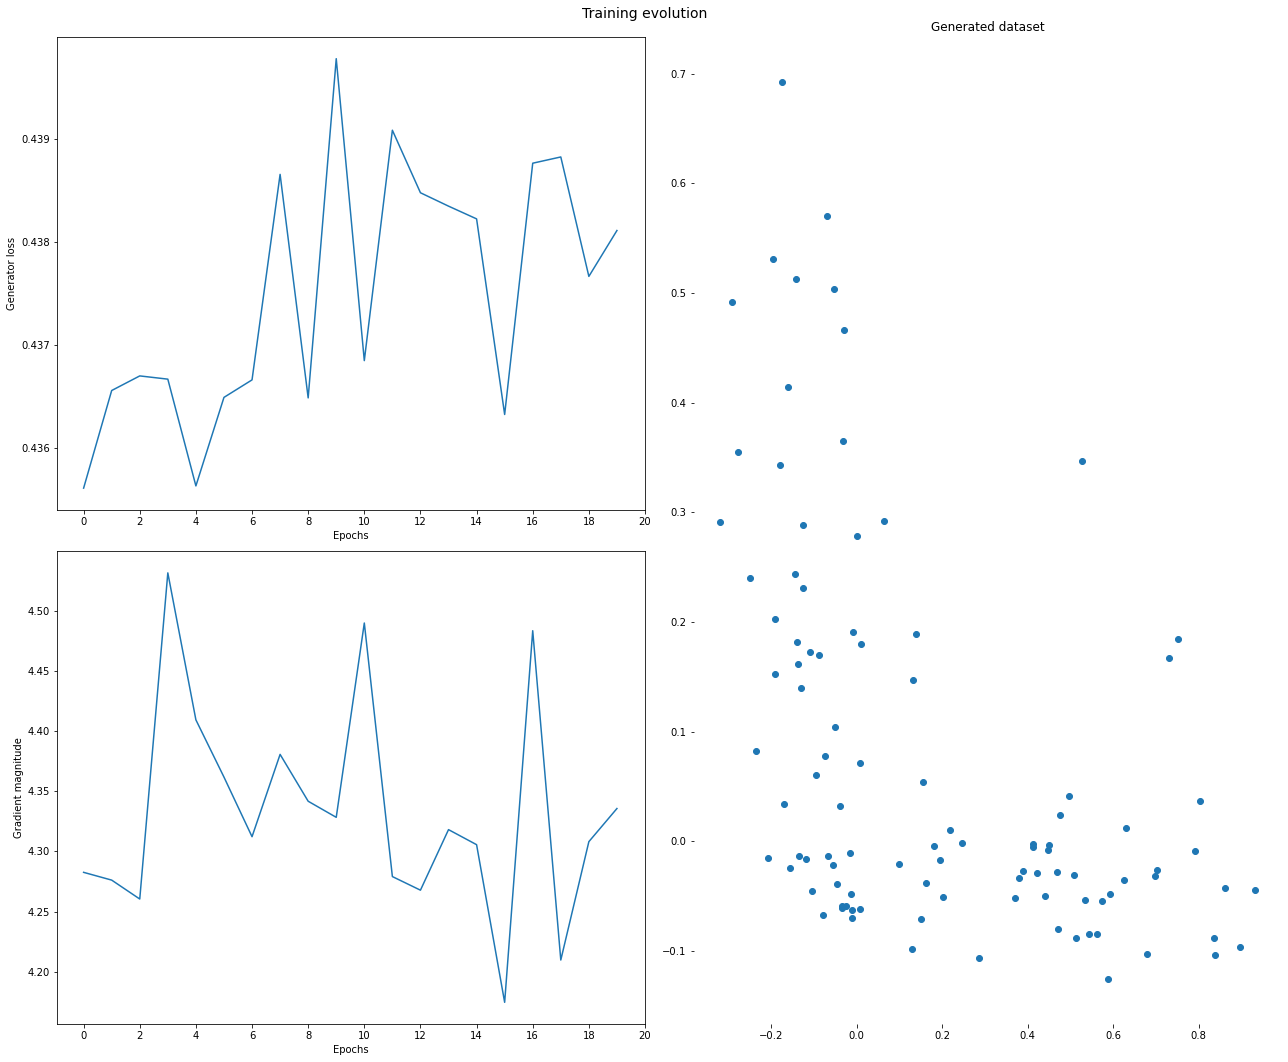

Preparing video ...
Done !


In [2]:
trainer = generator.Trainer(eps=20)
trainer.cuda()
trainer.train()